In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [5]:
data = pd.read_csv("survey lung cancer.csv")
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [3]:
data.shape

(309, 16)

In [6]:
data.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [5]:
data.nunique()

GENDER                    2
AGE                      39
SMOKING                   2
YELLOW_FINGERS            2
ANXIETY                   2
PEER_PRESSURE             2
CHRONIC DISEASE           2
FATIGUE                   2
ALLERGY                   2
WHEEZING                  2
ALCOHOL CONSUMING         2
COUGHING                  2
SHORTNESS OF BREATH       2
SWALLOWING DIFFICULTY     2
CHEST PAIN                2
LUNG_CANCER               2
dtype: int64

In [6]:
data.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [7]:
data.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [8]:
data['GENDER'].unique()

array(['M', 'F'], dtype=object)

In [9]:
counts=data['GENDER'].value_counts()
counts

M    162
F    147
Name: GENDER, dtype: int64

In [10]:
data['GENDER'].replace({'M':1, 'F':0},inplace=True)#male=1,female=0
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [11]:
data['LUNG_CANCER'].unique()

array(['YES', 'NO'], dtype=object)

In [12]:
data['LUNG_CANCER'].replace({'YES':1, 'NO':0},inplace=True)#YES=1,NO=0
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int64
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS OF BREATH    309 non-null    int64
 13  SWALLOWING DIFFICULTY  309 non-null    int64
 14  CHEST PAIN             309 non-null    int64
 15  LUNG_CANCER            309 non-null    i

<AxesSubplot:>

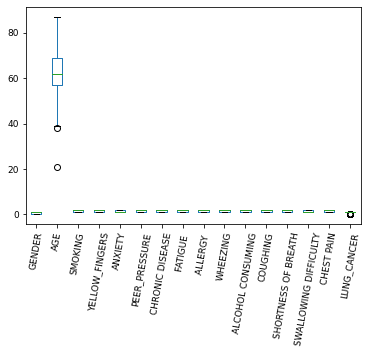

In [14]:
data.boxplot(grid=False, rot=80, fontsize=9) 
#boxplot of each varible together

In [15]:
q1=data['AGE'].quantile(0.25)
q3=data['AGE'].quantile(0.75)

iqr=q3-q1

lower_trial=q1-1.5*iqr
upper_trial=q3+1.5*iqr

print(lower_trial)
print(upper_trial)

39.0
87.0


C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


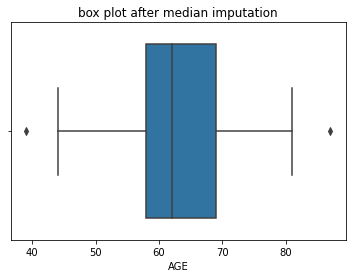

In [16]:
q1=data['AGE'].quantile(0.25)
q3=data['AGE'].quantile(0.75)
iqr=q3-q1
lower_trial=q1-1.5*iqr
upper_trial=q3+1.5*iqr
med=np.median(data['AGE'])
for i in data['AGE']:
    if i>upper_trial or i<lower_trial:
        data['AGE']=data['AGE'].replace(i,med)
sns.boxplot(data['AGE'])
plt.title("box plot after median imputation")
plt.show()

In [18]:
data.corr()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
GENDER,1.000000,-0.005984,0.036277,-0.212959,-0.152127,-0.275564,-0.204606,-0.083560,0.154251,0.141207,0.454268,0.133303,-0.064911,-0.078161,0.362958,0.067254
AGE,-0.005984,1.000000,-0.086005,-0.005501,0.029305,-0.007499,0.013566,0.032392,0.054056,0.048147,0.032109,0.168913,0.001807,-0.026978,-0.029511,0.053611
SMOKING,0.036277,-0.086005,1.000000,-0.014585,0.160267,-0.042822,-0.141522,-0.029575,0.001913,-0.129426,-0.050623,-0.129471,0.061264,0.030718,0.120117,0.058179
YELLOW_FINGERS,-0.212959,-0.005501,-0.014585,1.000000,0.565829,0.323083,0.041122,-0.118058,-0.144300,-0.078515,-0.289025,-0.012640,-0.105944,0.345904,-0.104829,0.181339
ANXIETY,-0.152127,0.029305,0.160267,0.565829,1.000000,0.216841,-0.009678,-0.188538,-0.165750,-0.191807,-0.165750,-0.225644,-0.144077,0.489403,-0.113634,0.144947
PEER_PRESSURE,-0.275564,-0.007499,-0.042822,0.323083,0.216841,1.000000,0.048515,0.078148,-0.081800,-0.068771,-0.159973,-0.089019,-0.220175,0.366590,-0.094828,0.186388
CHRONIC DISEASE,-0.204606,0.013566,-0.141522,0.041122,-0.009678,0.048515,1.000000,-0.110529,0.106386,-0.049967,0.002150,-0.175287,-0.026459,0.075176,-0.036938,0.110891
FATIGUE,-0.083560,0.032392,-0.029575,-0.118058,-0.188538,0.078148,-0.110529,1.000000,0.003056,0.141937,-0.191377,0.146856,0.441745,-0.132790,-0.010832,0.150673
ALLERGY,0.154251,0.054056,0.001913,-0.144300,-0.165750,-0.081800,0.106386,0.003056,1.000000,0.173867,0.344339,0.189524,-0.030056,-0.061508,0.239433,0.327766
WHEEZING,0.141207,0.048147,-0.129426,-0.078515,-0.191807,-0.068771,-0.049967,0.141937,0.173867,1.000000,0.265659,0.374265,0.037834,0.069027,0.147640,0.249300


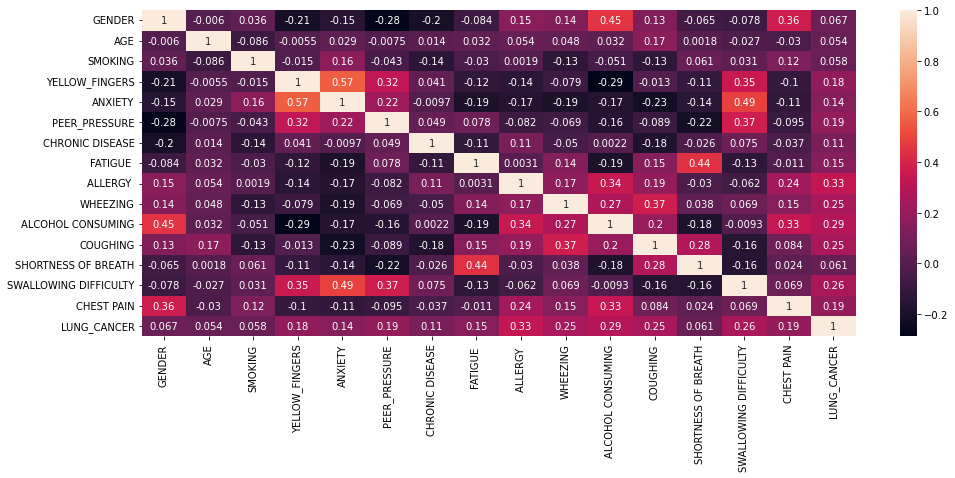

In [19]:
plt.figure(figsize=(16, 6))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [20]:
data['LUNG_CANCER'].value_counts()

1    270
0     39
Name: LUNG_CANCER, dtype: int64

In [21]:
q = data.drop(['LUNG_CANCER'],axis=1)
w = data['LUNG_CANCER']
q_resampled, w_resampled = SMOTE().fit_resample(q,w)

In [23]:
q = data.drop(['LUNG_CANCER'],axis=1)
w = data['LUNG_CANCER']

print(q.shape)
print(w.shape)

(309, 15)
(309,)


In [24]:
w_resampled.value_counts()

1    270
0    270
Name: LUNG_CANCER, dtype: int64

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


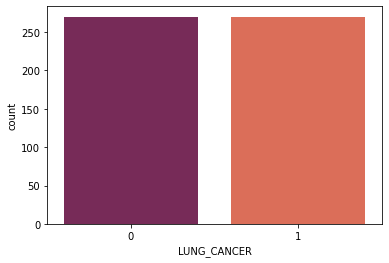

In [25]:
sns.countplot(w_resampled,label='counts',palette='rocket')
plt.show()

In [26]:
data.to_csv("final_eda.csv",index=False)

In [27]:
q_resampled.shape

(540, 15)

In [28]:
w_resampled.shape

(540,)

In [29]:
x=data[['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
       'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN','GENDER']]
y=data['LUNG_CANCER']

In [30]:
print(x.shape)
print(y.shape)

(309, 15)
(309,)


In [31]:
# from sklearn.preprocessing import StandardScaler

# scale = StandardScaler()
# x_scale = scale.fit_transform(x)
# print(x_scale)
# print(type(x_scale ))
# print(x_scale.shape)

In [32]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(q_resampled , w_resampled ,test_size=0.3,random_state=1)

In [33]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(378, 15)
(378,)
(162, 15)
(162,)


In [34]:
x_train.head(3)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
81,0,54,2,2,2,2,2,2,1,1,1,1,2,2,1
533,0,63,1,1,1,1,1,1,1,1,1,1,2,1,1
172,1,56,1,2,1,2,1,2,2,2,2,2,1,1,1


In [35]:
x_test.head(3)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
65,0,71,2,2,2,2,2,2,1,2,1,2,1,2,2
402,0,68,1,1,1,1,1,2,1,1,1,1,1,1,1
445,0,68,2,1,1,1,1,1,1,1,1,1,1,1,1


# Logistic regression

In [36]:
#logistic regression-binary data
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
from sklearn.metrics import accuracy_score
print("LR:",accuracy_score(y_test,y_pred)*100)

LR: 96.91358024691358


In [38]:
#confusion matrix which will tell where the machine gone wrong
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[84  3]
 [ 2 73]]


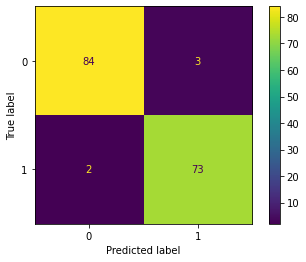

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay

cmd=ConfusionMatrixDisplay(cm,display_labels=lr.classes_)
cmd.plot()
#true_label-y_test,predicted label-y_pred

# KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

y_pred=knn.predict(x_test)

print(accuracy_score(y_test,y_pred)*100)

91.35802469135803


In [41]:
#confusion matrix which will tell where the machine gone wrong
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[83  4]
 [10 65]]


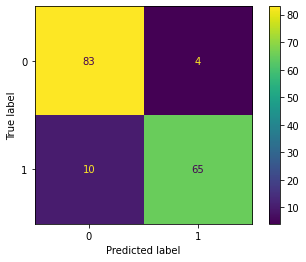

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay

cmd=ConfusionMatrixDisplay(cm,display_labels=knn.classes_)
cmd.plot()

# Naive bayes


In [43]:
#guassianNB
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

93.20987654320987


In [44]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[79  8]
 [ 3 72]]


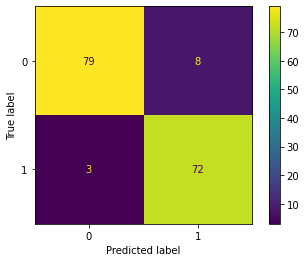

In [45]:
cmd=ConfusionMatrixDisplay(cm,display_labels=gnb.classes_)
cmd.plot()

# SVM

In [58]:
#support vector classifier
from sklearn.svm import SVC
sv=SVC(gamma='auto')
sv.fit(x_train,y_train)
y_pred=sv.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

93.82716049382715


In [60]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[81  6]
 [ 4 71]]


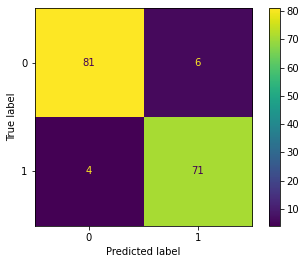

In [61]:
from sklearn.metrics import ConfusionMatrixDisplay
cmd=ConfusionMatrixDisplay(cm,display_labels=dt.classes_)
cmd.plot()

# Decision tree

In [48]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

94.44444444444444


In [49]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[84  3]
 [ 6 69]]


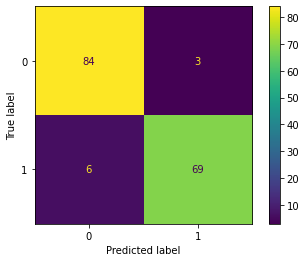

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay
cmd=ConfusionMatrixDisplay(cm,display_labels=dt.classes_)
cmd.plot()

# Random forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

96.91358024691358


In [52]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[86  1]
 [ 4 71]]


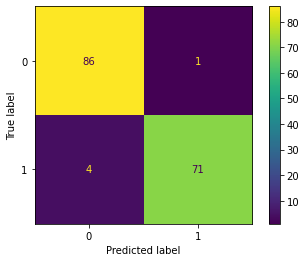

In [53]:
cm=confusion_matrix(y_test,y_pred)
cmd=ConfusionMatrixDisplay(cm,display_labels=rfc.classes_)
cmd.plot()

In [54]:
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1


In [55]:
# import pickle

In [55]:
# pickle.dump(rfc,open('lungmodel4.pkl','wb'))

In [56]:
# print(x.head(3))


In [57]:
# df=[1,69,1,2,2,1,1,2,1,2,2,2,2,2,2]

In [58]:
# df2=[69,1,2,2,1,1,2,1,2,2,2,2,2,2,1]

In [59]:
# df1=[0,63,1,2,1,1,1,1,1,2,1,2,2,1,1]

In [60]:
# df3=[0,59,1,1,1,2,1,2,1,2,1,2,2,1,2]

In [61]:
# df4=[59,1,1,1,2,1,2,1,2,1,2,2,1,2,0]

In [62]:
# import warnings
# warnings.filterwarnings('ignore')

# model=pickle.load(open('lungmodel4.pkl','rb'))
# import numpy as np
# arr=np.array(df3).reshape(1,-1)

# result=model.predict(arr)
# print(result[0])

0


In [63]:
# data=[0,68,2,1,2,1,1,2,1,1,1,1,1,1,1]
# data1=[0,59,1,1,1,2,1,2,1,2,1,2,2,1,2]
# data2=[1,63,2,2,2,1,1,1,1,1,2,1,1,2,2]
# model=pickle.load(open('lungmodel4.pkl','rb'))
# arr=np.array(data1).reshape(1,-1)

# result=model.predict(arr)
# print(result[0])

0


In [64]:
# import joblib

In [65]:
# joblib.dump(lr,open('lungmodel.pkl','wb'))

In [66]:
# data=[0,59,1,1,1,2,1,2,1,2,1,2,2,1,2]

In [57]:
# import warnings
# warnings.filterwarnings('ignore')

# model=joblib.load(open('lungmodel4.pkl','rb'))
# import numpy as np
# arr=np.array(data).reshape(1,-1)

# result=model.predict(arr)
# print(result[0])